In [1]:
import numpy as np
from sklearn import preprocessing

input_data = np.array([[ 5.1, -2.9,  3.3],
                       [-1.2,  7.8, -6.1],
                       [ 3.9,  0.4,  2.1],
                       [ 7.3, -9.9, -4.5]])

In [2]:
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("Binarized data:\n", data_binarized)

Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [3]:
print("BEFORE:")
print("Mean =", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))

BEFORE:
Mean = [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]


In [4]:
data_scaled = preprocessing.scale(input_data)
print("AFTER:")
print("Mean =", data_scaled.mean(axis=0))
print("Std devistion =", data_scaled.std(axis=0))

AFTER:
Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std devistion = [1. 1. 1.]


In [5]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print(input_data)
print("Min max scaled data:\n", data_scaled_minmax)

[[ 5.1 -2.9  3.3]
 [-1.2  7.8 -6.1]
 [ 3.9  0.4  2.1]
 [ 7.3 -9.9 -4.5]]
Min max scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]


In [6]:
# データを正規化する
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("L1 normalized data:\n", data_normalized_l1)
print("L2 normalized data:\n", data_normalized_l2)

L1 normalized data:
 [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]
L2 normalized data:
 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


In [7]:
import numpy as np
from sklearn import preprocessing

input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

print("Label mapping:")

for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)

Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


In [8]:
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print("Labels =", test_labels)
print("Encoded values =", list(encoded_values))

Labels = ['green', 'red', 'black']
Encoded values = [1, 2, 0]


In [9]:
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("Encoded values =", encoded_values)
print("Decoded valued =", decoded_list)

Encoded values = [3, 0, 4, 1]
Decoded valued = ['white' 'black' 'yellow' 'green']


In [10]:
import numpy as np
from sklearn import linear_model

X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5],
             [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4],
             [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

classifier = linear_model.LogisticRegression(solver='liblinear',
                                             C=1, multi_class='auto')
classifier.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_classifier(classifier, X, y, title=''):
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    mesh_step_size = 0.01

    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size),
                                 np.arange(min_y, max_y, mesh_step_size))

    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    output = output.reshape(x_vals.shape)
    
    plt.figure()
    plt.title(title)
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1,
                cmap=plt.cm.Paired)
    
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    plt.xticks((np.arange(int(min_x), int(max_x), 1.0)))
    plt.yticks((np.arange(int(min_y), int(max_y), 1.0)))
    
    plt.show()

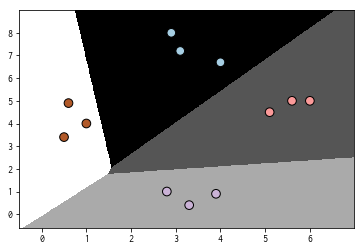

In [12]:
visualize_classifier(classifier, X, y)

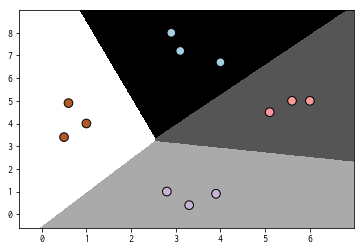

In [13]:
classifier100 = linear_model.LogisticRegression(solver='liblinear', C=100,
                                             multi_class='auto')
classifier100.fit(X, y)

visualize_classifier(classifier100, X, y)

In [14]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

input_file = 'data_multivar_nb.txt'

In [15]:
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]
#print(X)
#print(y)

In [16]:
classifier = GaussianNB()
classifier.fit(X, y)

y_pred = classifier.predict(X)
print(y_pred)

[0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 3. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.
 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0.

Accuracy of Naive Bayes classifier = 99.75 %


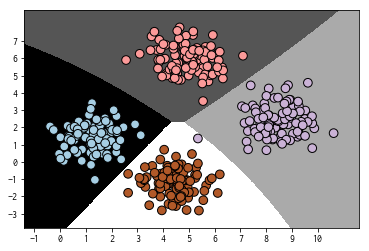

In [17]:
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")

visualize_classifier(classifier, X, y)

In [18]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                   test_size=0.2,
                                                                   random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

Accuracy of the new classifier = 100.0 %


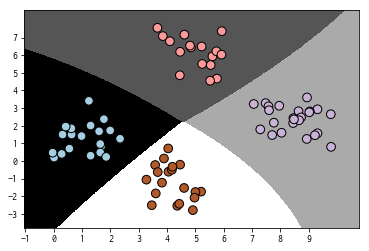

In [19]:
accuracy = 100 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

visualize_classifier(classifier_new, X_test, y_test)

In [20]:
num_folds = 3
accuracy_values = model_selection.cross_val_score(classifier,
                                                 X, y, scoring='accuracy',
                                                 cv=num_folds)
print("Accuracy: " + str(round(100 * accuracy_values.mean())) + "%")

precision_values = model_selection.cross_val_score(classifier,
                                                  X, y, scoring='precision_weighted',
                                                  cv=num_folds)
print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")

recall_values = model_selection.cross_val_score(classifier,
                                               X, y, scoring='recall_weighted',
                                               cv=num_folds)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")

f1_values = model_selection.cross_val_score(classifier,
                                           X, y, scoring='f1_weighted',
                                           cv = num_folds)
print("F1: " + str(round(100 * f1_values.mean(), 2)) + "%")

Accuracy: 100.0%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

confusion_mat = confusion_matrix(true_labels, pred_labels)
print(confusion_mat)

[[2 1 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 1 0 2 0]
 [0 0 0 1 1]]


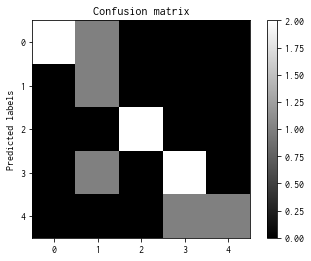

In [22]:
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [23]:
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print(classification_report(true_labels, pred_labels, target_names=targets))

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

   micro avg       0.73      0.73      0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11



In [24]:
# p.43 2.8 support vector machine: SVM
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn import model_selection

input_file = 'income_data.txt'

Xy = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

In [25]:
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
            
        if '?' in line:
            continue
            
        data = line[:-1].split(', ')
        
        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            Xy.append(data)
            count_class1 += 1
            
        if data[-1] == '>50K' and count_class1 < max_datapoints:
            Xy.append(data)
            count_class2 += 1
            
Xy = np.array(Xy)
print(Xy)

[['39' 'State-gov' '77516' ... '40' 'United-States' '<=50K']
 ['50' 'Self-emp-not-inc' '83311' ... '13' 'United-States' '<=50K']
 ['38' 'Private' '215646' ... '40' 'United-States' '<=50K']
 ...
 ['58' 'Private' '151910' ... '40' 'United-States' '<=50K']
 ['22' 'Private' '201490' ... '20' 'United-States' '<=50K']
 ['52' 'Self-emp-inc' '287927' ... '40' 'United-States' '>50K']]


In [26]:
label_encoder = []
Xy_encoded = np.empty(Xy.shape)
for i, item in enumerate(Xy[0]):
    if item.isdigit():
        Xy_encoded[:, i] = Xy[:, i]
    else:
        encoder = preprocessing.LabelEncoder()
        Xy_encoded[:, i] = encoder.fit_transform(Xy[:, i])
        label_encoder.append(encoder)
        
X = Xy_encoded[:, :-1].astype(int)
y = Xy_encoded[:, -1].astype(int)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size=0.2,
                                                                    random_state=5)

classifier = LinearSVC(random_state=0)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

f1 = model_selection.cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("F1 score: " + str(round(100 * f1.mean(), 2)) + "%")

/Users/nagahamanil/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/nagahamanil/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/nagahamanil/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1 score: 66.82%


/Users/nagahamanil/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
